In [22]:
import pickle

import pandas as pd
import numpy as np
from scipy.stats import zscore

import datetime
import dateutil.parser

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load and setup the turnstile dataframe - the data used here is 2019 March-June data
df_MTA = pd.read_csv('turnstile_191005.csv',index_col=False,inplace=True)
df_MTA.columns = df_MTA.columns.str.strip()

In [24]:
# Reformat date and create day of week column, standardize some station names
df_MTA['DATE'] = [dateutil.parser.parse(date) for date in df_MTA['DATE']]
df_MTA['DAY_OF_WEEK'] = [datetime.datetime.weekday(date) for date in df_MTA['DATE']]

In [37]:
df_MTA.head(7)
# 5 - Sat
# 6 - Sun
# 0 - Mon
# 1 - Tue
# 2 - Wed
# 3 - Thurs
# 4 - Fri

,C/A,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DAY_OF_WEEK
0,A002,2019-02-23,REGULAR,BMT,6955483,2359112,NQR456W,02-00-00,59 ST,03:00:00,R051,5
1,A002,2019-02-23,REGULAR,BMT,6955494,2359125,NQR456W,02-00-00,59 ST,07:00:00,R051,5
2,A002,2019-02-23,REGULAR,BMT,6955554,2359199,NQR456W,02-00-00,59 ST,11:00:00,R051,5
3,A002,2019-02-23,REGULAR,BMT,6955714,2359248,NQR456W,02-00-00,59 ST,15:00:00,R051,5
4,A002,2019-02-23,REGULAR,BMT,6956004,2359292,NQR456W,02-00-00,59 ST,19:00:00,R051,5
5,A002,2019-02-23,REGULAR,BMT,6956147,2359325,NQR456W,02-00-00,59 ST,23:00:00,R051,5
6,A002,2019-02-24,REGULAR,BMT,6956177,2359332,NQR456W,02-00-00,59 ST,03:00:00,R051,6


In [41]:
#Kick out stations to leave the top 10 highest volume stations in the dataframe
with open('worst_stations_list.pickle','rb') as read_file:
    worst_stations_list = pickle.load(read_file)



,C/A,DATE,DESC,DIVISION,ENTRIES,EXITS,LINENAME,SCP,STATION,TIME,UNIT,DAY_OF_WEEK
0,A002,2019-02-23,REGULAR,BMT,6955483,2359112,NQR456W,02-00-00,59 ST,03:00:00,R051,5
1,A002,2019-02-23,REGULAR,BMT,6955494,2359125,NQR456W,02-00-00,59 ST,07:00:00,R051,5
2,A002,2019-02-23,REGULAR,BMT,6955554,2359199,NQR456W,02-00-00,59 ST,11:00:00,R051,5
3,A002,2019-02-23,REGULAR,BMT,6955714,2359248,NQR456W,02-00-00,59 ST,15:00:00,R051,5
4,A002,2019-02-23,REGULAR,BMT,6956004,2359292,NQR456W,02-00-00,59 ST,19:00:00,R051,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3680528,TRAM2,2019-06-28,REGULAR,RIT,5554,379,R,00-05-01,RIT-ROOSEVELT,05:00:00,R469,4
3680529,TRAM2,2019-06-28,REGULAR,RIT,5554,379,R,00-05-01,RIT-ROOSEVELT,09:00:00,R469,4
3680530,TRAM2,2019-06-28,REGULAR,RIT,5554,379,R,00-05-01,RIT-ROOSEVELT,13:00:00,R469,4
3680531,TRAM2,2019-06-28,REGULAR,RIT,5554,379,R,00-05-01,RIT-ROOSEVELT,17:00:00,R469,4


In [48]:
#df_MTA_byDate: stores total daily entries per turnstile using groupby, min cumulative counts, 
# and the diff function. 
# We do some cleaning / kick out the unreasonable counts where 
# something went wrong with the cumulative tracker in the data.

df_MTA_byDate = df_MTA.groupby(['C/A','UNIT','SCP','STATION','DATE','DAY_OF_WEEK']) \
                .ENTRIES.agg({'MIN_ENTRIES':'min'})

df_MTA_byDate = df_MTA_byDate.reset_index()

df_MTA_byDate['DAILY_ENTRIES'] = df_MTA_byDate.groupby(['C/A','UNIT','SCP','STATION']) \
                                 .MIN_ENTRIES.diff().shift(-1)

df_MTA_byDate.drop('MIN_ENTRIES',axis=1,inplace=True) 
df_MTA_byDate.loc[df_MTA_byDate['DAILY_ENTRIES'] < 0, 'DAILY_ENTRIES'] = np.nan
df_MTA_byDate.loc[df_MTA_byDate['DAILY_ENTRIES'] > 100000, 'DAILY_ENTRIES'] = np.nan
df_MTA_byDate

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  import sys


,C/A,UNIT,SCP,STATION,DATE,DAY_OF_WEEK,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-02-23,5,694.0
1,A002,R051,02-00-00,59 ST,2019-02-24,6,405.0
2,A002,R051,02-00-00,59 ST,2019-02-25,0,1355.0
3,A002,R051,02-00-00,59 ST,2019-02-26,1,1408.0
4,A002,R051,02-00-00,59 ST,2019-02-27,2,1345.0
...,...,...,...,...,...,...,...
609685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-24,0,0.0
609686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-25,1,0.0
609687,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-26,2,0.0
609688,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-27,3,0.0


In [58]:
#df_MTA_Stat_Daily: stores total daily entries per Station
df_MTA_Stat_Daily = df_MTA_byDate.reset_index().drop(['C/A','SCP','UNIT'],axis=1)
df_MTA_Stat_Daily = df_MTA_Stat_Daily.groupby(['STATION','DATE','DAY_OF_WEEK']).DAILY_ENTRIES \
                    .agg({'DAILY_ENTRIES':'sum'}) \
                    .reset_index()
df_MTA_Stat_Daily

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


,STATION,DATE,DAY_OF_WEEK,DAILY_ENTRIES
0,1 AV,2019-02-23,5,2.0
1,1 AV,2019-02-24,6,1.0
2,1 AV,2019-02-25,0,18567.0
3,1 AV,2019-02-26,1,19762.0
4,1 AV,2019-02-27,2,20150.0
...,...,...,...,...
47522,ZEREGA AV,2019-06-24,0,2695.0
47523,ZEREGA AV,2019-06-25,1,2657.0
47524,ZEREGA AV,2019-06-26,2,2861.0
47525,ZEREGA AV,2019-06-27,3,2651.0


In [59]:
#df_MTA_Stat_WkDay: stores avg and std daily entries by day of the week per Station
df_MTA_Stat_WkDay = df_MTA_Stat_Daily.groupby(['STATION','DAY_OF_WEEK']).DAILY_ENTRIES \
                    .agg({'AVG_DAILY_ENTRIES':'mean','STD_DAILY_ENTRIES':'std'}) \
                    .reset_index()
df_MTA_Stat_WkDay

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


,STATION,DAY_OF_WEEK,AVG_DAILY_ENTRIES,STD_DAILY_ENTRIES
0,1 AV,0,17231.166667,3345.389035
1,1 AV,1,19338.277778,922.950117
2,1 AV,2,19914.388889,926.364567
3,1 AV,3,19954.666667,1233.205865
4,1 AV,4,19197.777778,4972.793540
...,...,...,...,...
2648,ZEREGA AV,2,2826.166667,113.620239
2649,ZEREGA AV,3,2783.500000,111.785114
2650,ZEREGA AV,4,2486.611111,648.197876
2651,ZEREGA AV,5,1280.777778,157.391814


In [71]:
#df_MTA_Stat_AnyDay: stores avg daily entries for any day of the week per Station,
#sorted in descending order of avg daily entries
df_MTA_Stat_AnyDay = df_MTA_Stat_Daily.groupby(['STATION']).DAILY_ENTRIES \
                    .agg({'AVG_DAILY_ENTRIES':'mean'}) \
                    .reset_index()
df_MTA_Stat_AnyDay

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


,STATION,AVG_DAILY_ENTRIES
0,1 AV,15523.619048
1,103 ST,25979.412698
2,103 ST-CORONA,17628.174603
3,104 ST,3300.531746
4,110 ST,9424.520000
...,...,...
374,WOODLAWN,6006.047619
375,WORLD TRADE CTR,14939.404762
376,WTC-CORTLANDT,11507.603175
377,YORK ST,10776.841270


In [62]:
#df_MTA_Stat_AnyDay: stores avg daily entries for any day of the week per Station,
#sorted in descending order of avg daily entries
df_MTA_Stat_AnyDay = df_MTA_Stat_Daily.groupby(['STATION']).DAILY_ENTRIES \
                    .agg({'AVG_DAILY_ENTRIES':'mean'}) \
                    .reset_index()
                    
df_MTA_Stat_AnyDay = df_MTA_Stat_AnyDay \
                    .sort_values(by='AVG_DAILY_ENTRIES',ascending=False) \
                    .reset_index()
df_MTA_Stat_AnyDay

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


,index,STATION,AVG_DAILY_ENTRIES
0,61,34 ST-PENN STA,146871.690476
1,233,GRD CNTRL-42 ST,126741.047619
2,59,34 ST-HERALD SQ,101381.817460
3,46,23 ST,98524.087302
4,14,14 ST-UNION SQ,90312.658730
...,...,...,...
374,333,ROCKAWAY PARK B,631.484127
375,148,BEACH 98 ST,442.523810
376,162,BROAD CHANNEL,271.611111
377,141,BEACH 105 ST,228.841270


In [64]:
#Record station names with the most entry volume                    
Stations_Top10 = df_MTA_Stat_AnyDay['STATION'].values[:10]
Stations_Top6 = df_MTA_Stat_AnyDay['STATION'].values[:6]

array(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST',
       '14 ST-UNION SQ', 'TIMES SQ-42 ST', '42 ST-PORT AUTH', 'FULTON ST',
       '86 ST', '125 ST'], dtype=object)

In [67]:
#df_MTA_Stat_WkDay_Top10: avg daily by day of week for top 10 stations
#df_MTA_Stat_WkDay_Top6: avg daily by day of week for top 6 stations    
df_MTA_Stat_WkDay_Top10 = df_MTA_Stat_WkDay[df_MTA_Stat_WkDay['STATION'].isin(Stations_Top10)]   
df_MTA_Stat_WkDay_Top6 = df_MTA_Stat_WkDay[df_MTA_Stat_WkDay['STATION'].isin(Stations_Top6)] 

df_MTA_Stat_WkDay_Top10.sort_values(by='AVG_DAILY_ENTRIES', ascending=False)

,STATION,DAY_OF_WEEK,AVG_DAILY_ENTRIES,STD_DAILY_ENTRIES
430,34 ST-PENN STA,3,190089.944444,50948.355277
429,34 ST-PENN STA,2,176815.111111,3199.281498
428,34 ST-PENN STA,1,176044.777778,4415.550203
1634,GRD CNTRL-42 ST,3,165083.833333,3231.694898
1633,GRD CNTRL-42 ST,2,164430.500000,5251.206296
...,...,...,...,...
1587,FULTON ST,5,40752.944444,3003.183614
328,23 ST,6,40436.277778,4055.701431
69,125 ST,6,39654.111111,2812.099465
776,86 ST,6,36920.055556,2894.614807


In [69]:
days_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# 5 - Sat
# 6 - Sun
# 0 - Mon
# 1 - Tue
# 2 - Wed
# 3 - Thurs
# 4 - Fri

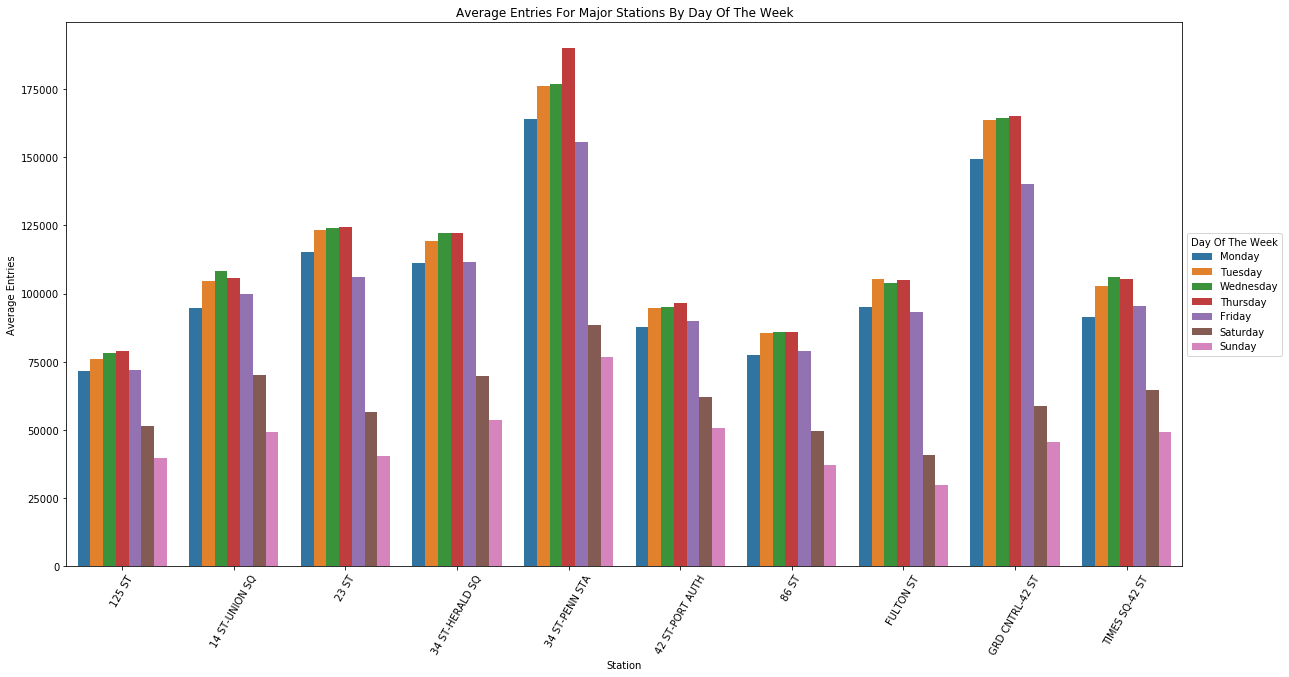

<Figure size 432x288 with 0 Axes>

In [91]:
days_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(figsize=(20, 10))
labels = []

ax = sns.barplot(x='STATION', y='AVG_DAILY_ENTRIES',
                 hue='DAY_OF_WEEK', hue_order=days_list,
                 data=df_MTA_Stat_WkDay_Top10 \
                      .replace({'DAY_OF_WEEK' : \
                               {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', \
                                3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}}))

plt.title('Average Entries For Major Stations By Day Of The Week')
plt.xlabel('Station')
plt.ylabel('Average Entries')
ax.legend(title='Day Of The Week',ncol=1,loc='center left', bbox_to_anchor=(1,0.5))

plt.xticks(rotation=60)
plt.show()
plt.tight_layout();

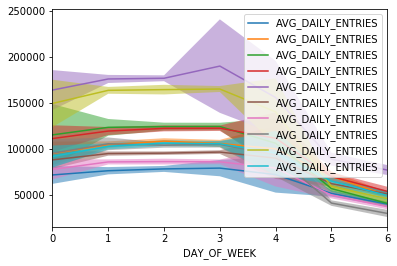

In [70]:
# SKIP PLOT

fig, ax = plt.subplots()
labels = []
for station, grp in df_MTA_Stat_WkDay_Top10.groupby(['STATION']):
    ax = grp.plot(ax=ax, kind='line', x='DAY_OF_WEEK', y='AVG_DAILY_ENTRIES')
    labels.append(station)
    plt.fill_between(grp['DAY_OF_WEEK'], \
                     grp['AVG_DAILY_ENTRIES']-grp['STD_DAILY_ENTRIES'], \
                     grp['AVG_DAILY_ENTRIES']+grp['STD_DAILY_ENTRIES'], \
                     alpha=0.5)